# LAB 4  
## PRINCIPLE COMPONENT ANALYSIS  

### INTRODUCTION  

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. 

When building a model with large datasets, a major concern is overfitting the model. With so many attributes to consider, the model may pick on the less important features. However, by dropping attributes from the dataset we immediately throw away all the relations and advantages those attributes would bring. So, how can we maintain the data, its relations and reduce its dimensions?

**STEP 1**    
Seperate the independent variable from the dependent variable.  
We create new attributes that capture the relationship and strength of the relationship between the other attributes of the dataset. The sort these new attributes in order from strongest to weekest in terms of the strength of the relationship i.e. how well the attribute predicts the dependent variable.

* The new attributes are created as follows:  
  $Z_i=x_i - mean(x)$

  This will product a matrix $Z$.

**STEP 2**  
Multiply the transpose of the newly created matrix $Z^{-1}$ with $Z$ to obtain the convariance matrix.

**STEP 3**  
Calculate the eigon values and eigon vectors of the covariance matrix $Z^{-1}Z$. The eigon vectors so obatined are independent of each other.

**STEP 4**  
Sort the eigon values obtained in descending order. Decide how many egion vectors to consider for the next step based on the eigon values.

**STEP 5**  
Multiply $Z^{-1}Z$ with the original dataset. Now, because the eigon vectors are independent of each other, so is the product of the matrices mentioned. The obtained matrix is a matrix of the principle components.

The principal components are orthogonal to each other. Therefore, they are statistically linearly independent of one another. This mean the columns on the matrix are linearly independent of each other.

In [2]:
#importing packages for manipulating dataframes and arrays
import numpy as np
import pandas as pd

#importing packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#package to print array cleanly
from prettytable import PrettyTable

#package from sklearn that performs PCA
from sklearn.decomposition import PCA

### EDA

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


In [5]:
#importing the dataset
df=pd.read_csv("Wine.csv")
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [6]:
#understanding the dimensions of the dataset
df.shape

(178, 14)

The dataset has **14** columns.

1. Alcohol
2. Malic_Acid
3. Ash
4. Ash_Alcanity
5. Magnesium
6. Total_Phenols	
7. Flavanoids	
8. Nonflavanoid_Phenols	
9. Proanthocyanins	
10. Color_Intensity	
11. Hue	
12. OD280	
13. Proline	
14. Customer_Segment

In [7]:
#looking for data inconsistensy and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.describe().T

count        mean         std     min       25%  \
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Ash_Alcanity          178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   
Customer_Segment      178.0    1.938202    0.775035    1.00    1.0000   

                          50%       75%      max  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Ash_Alcanity           19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00  
Customer_Segment        2.000    3.0000     3.00

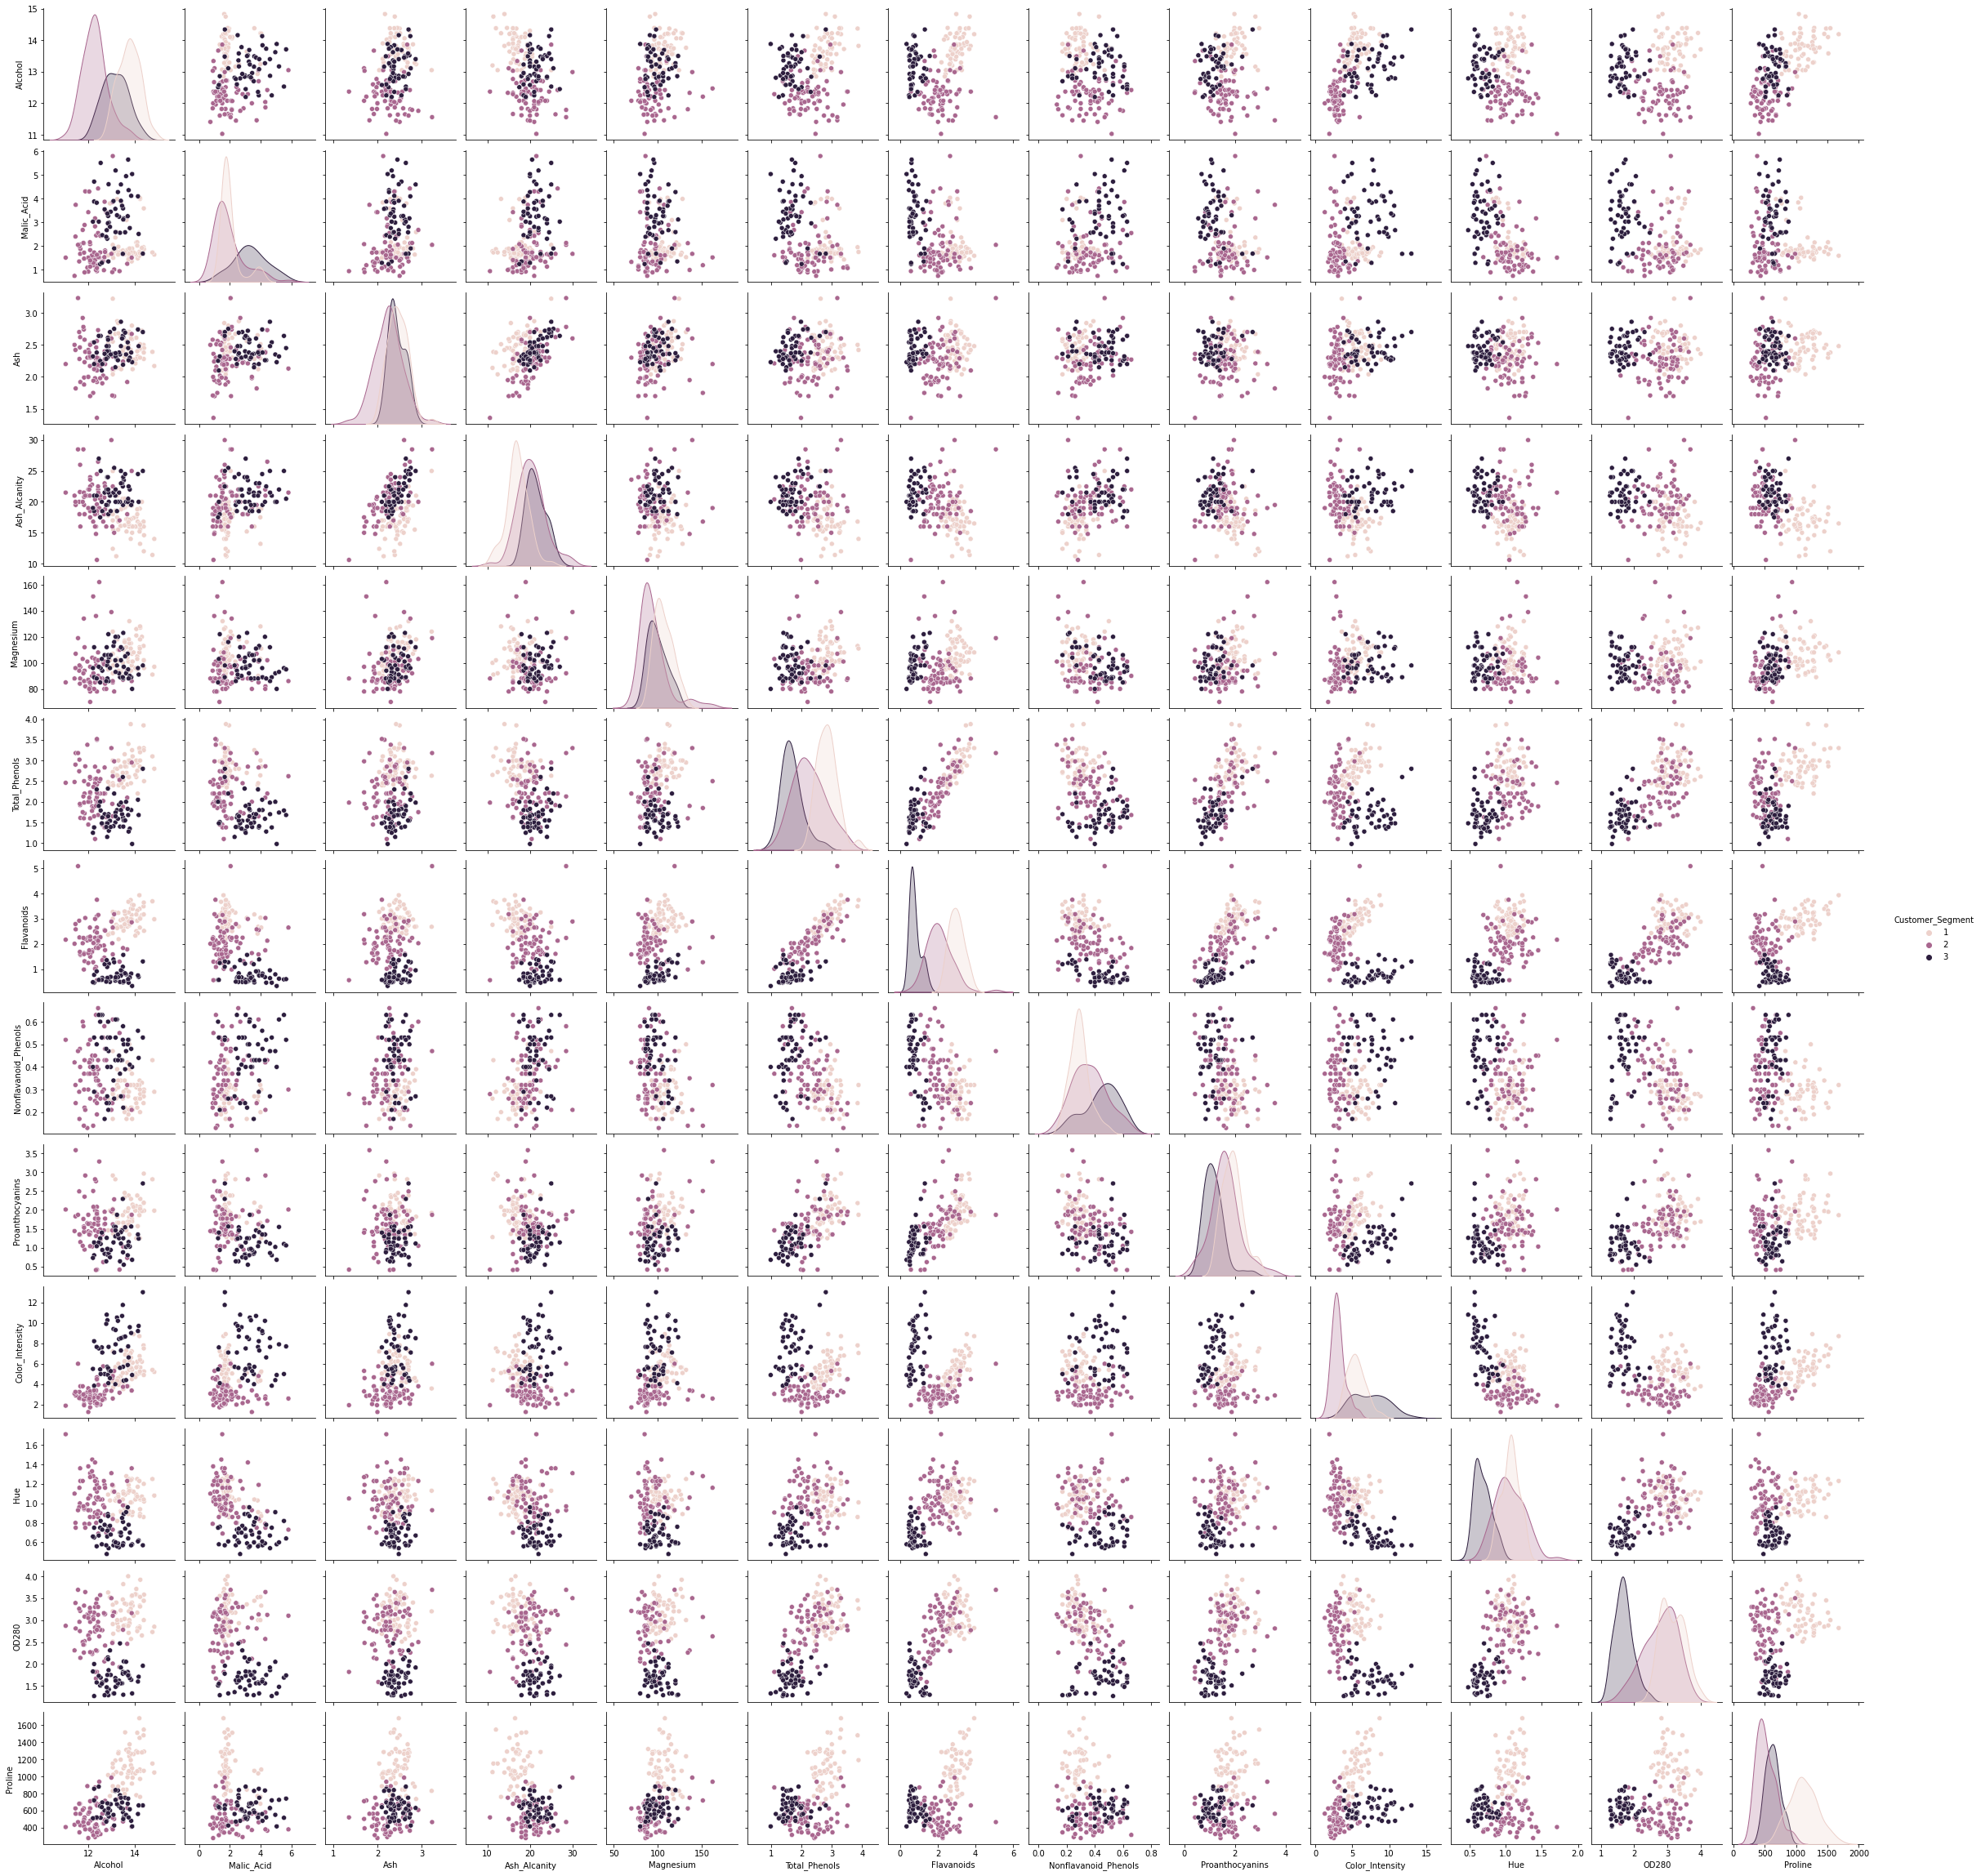

In [9]:
#understanding the distribution of the data visually
sns.pairplot(df,hue='Customer_Segment')

DEPICTING ORTHOGONALITY IN THE DATA AFTER PCA  

Only to show orthogonality, sklearn library is used. Step by step implementaion is below.


In [10]:
#function to draw the direction of the data
def draw_vector(v0, v1, ax=None):
    #intialising the plot space 
    ax = ax or plt.gca()

    #providing specifications about the arrow's appearance
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)

    #plotting the arrow corresponding to the directions of two attributes
    ax.annotate('', v1, v0, arrowprops=arrowprops)

<ipython-input-11-fa5d0087fd41>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


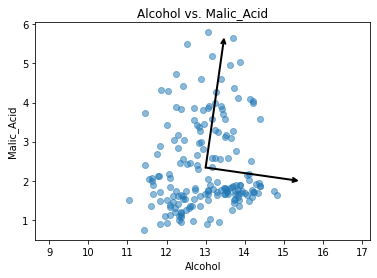

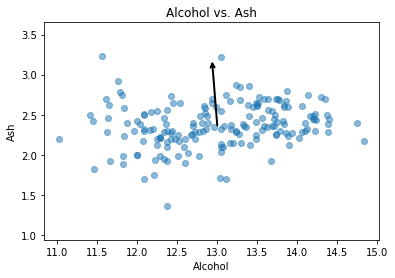

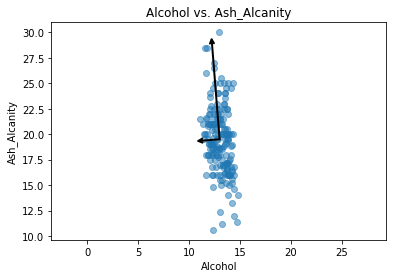

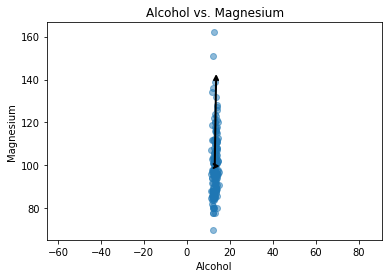

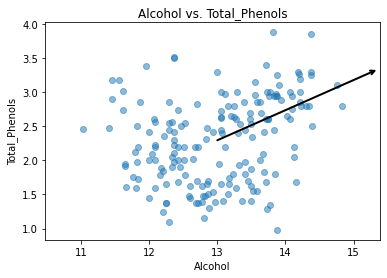

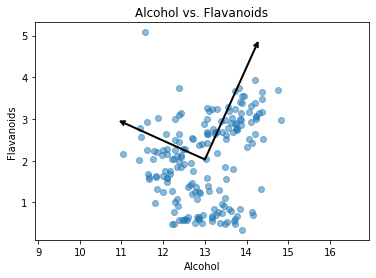

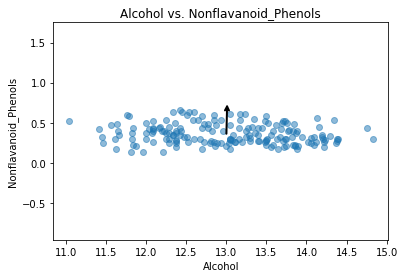

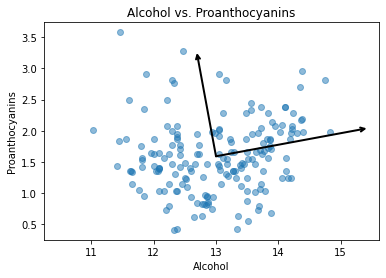

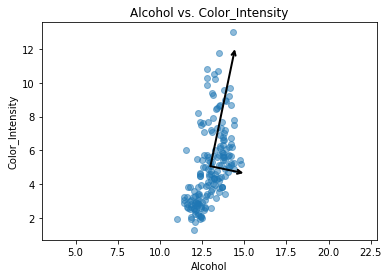

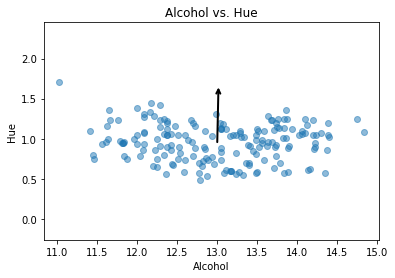

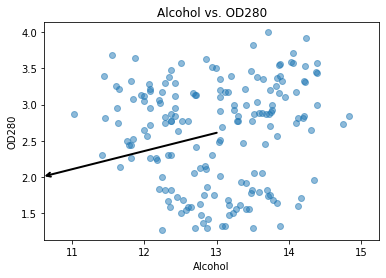

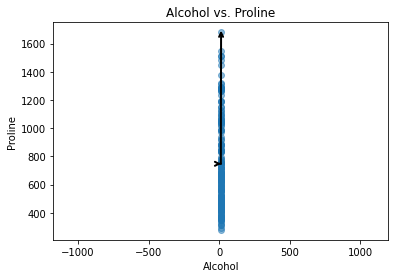

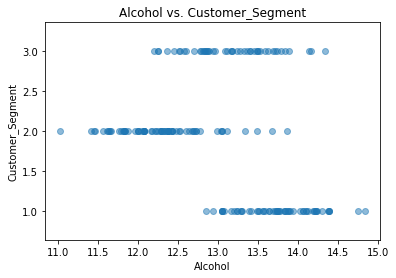

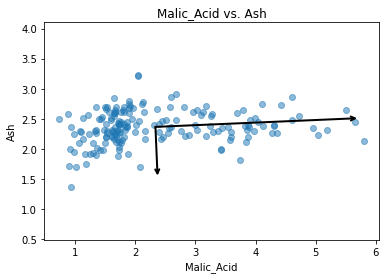

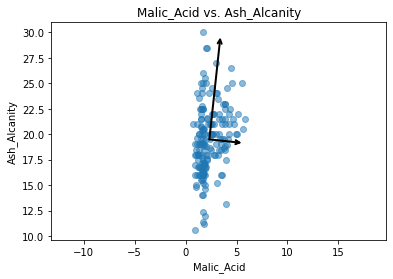

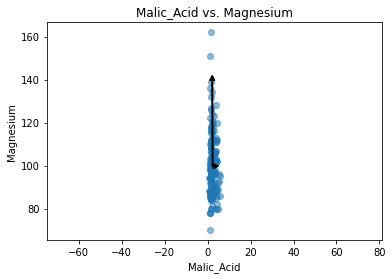

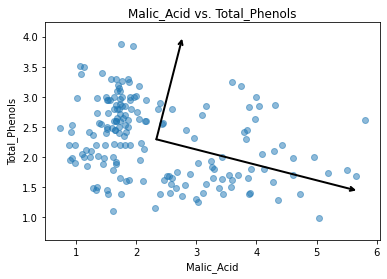

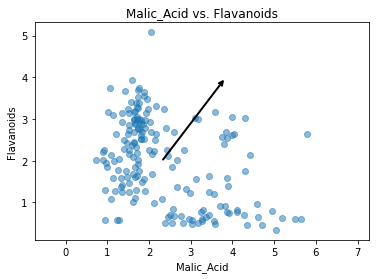

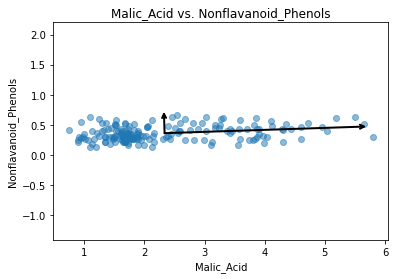

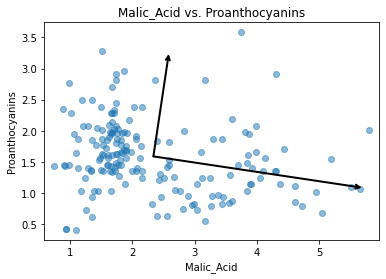

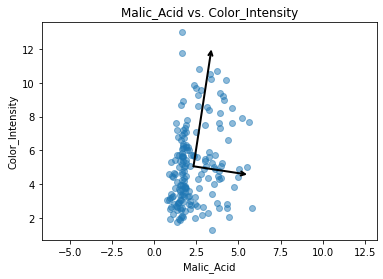

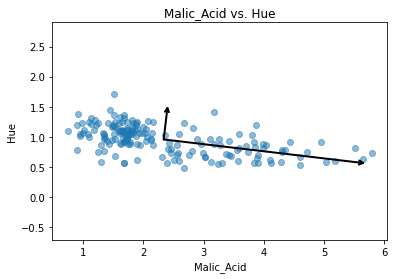

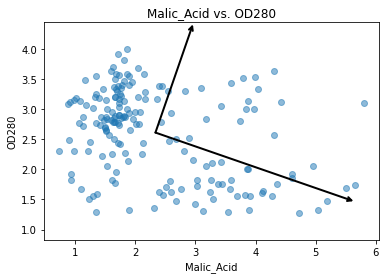

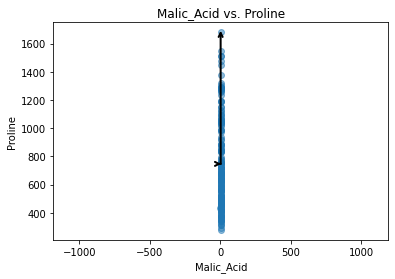

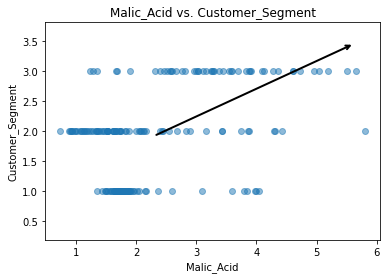

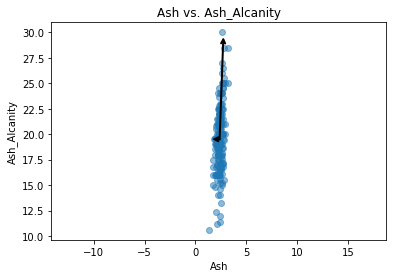

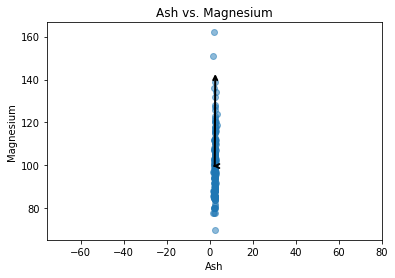

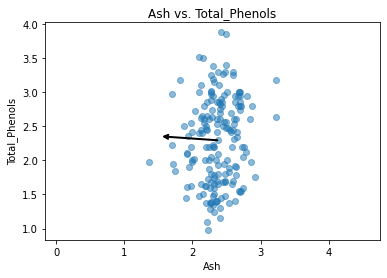

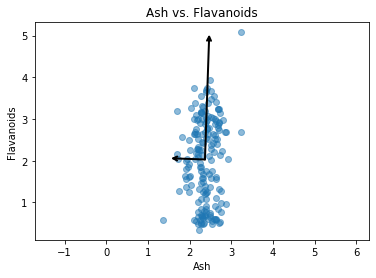

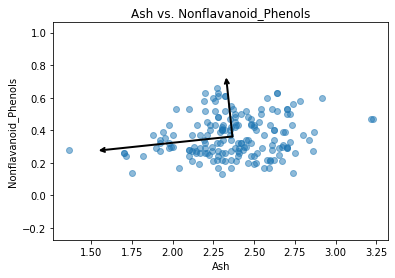

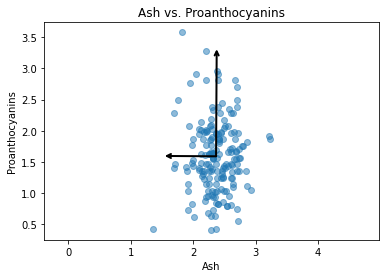

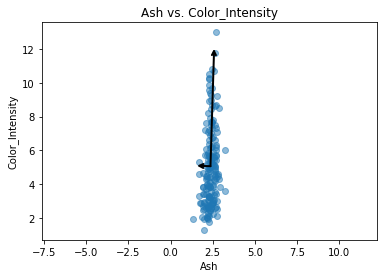

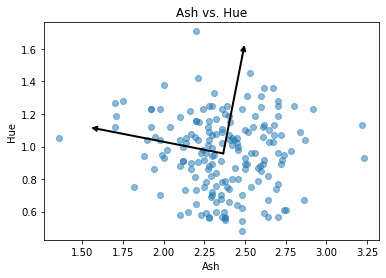

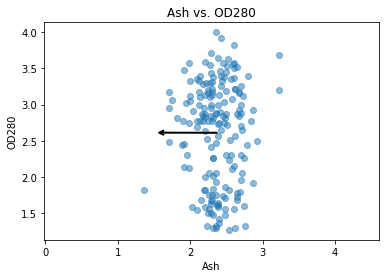

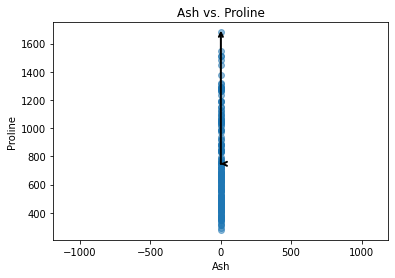

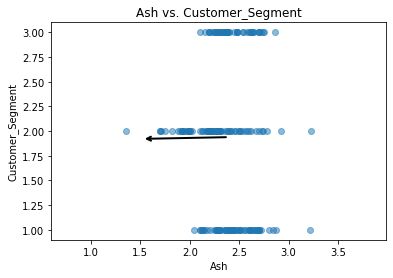

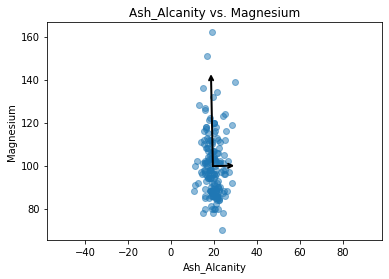

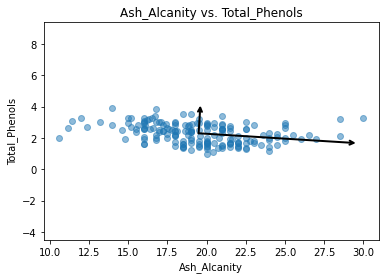

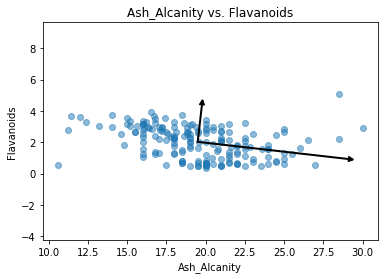

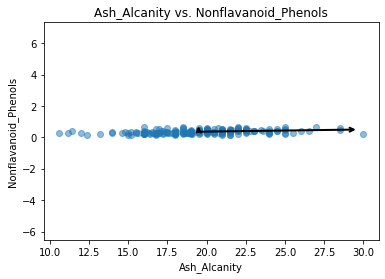

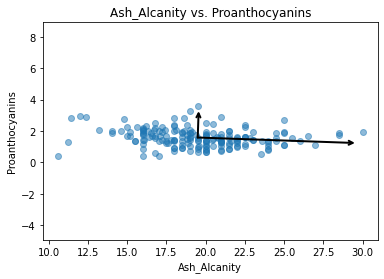

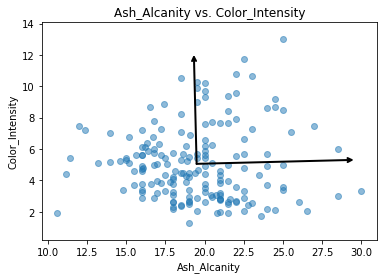

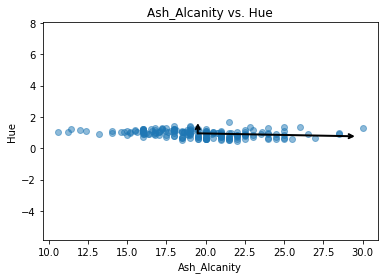

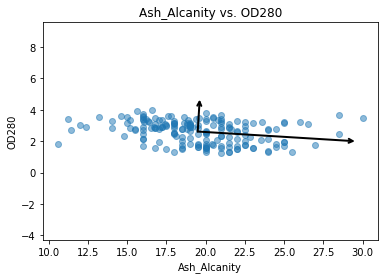

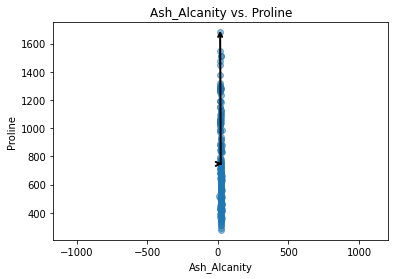

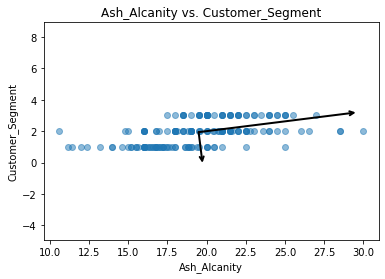

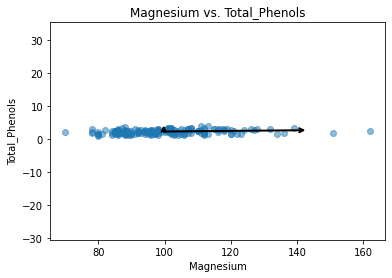

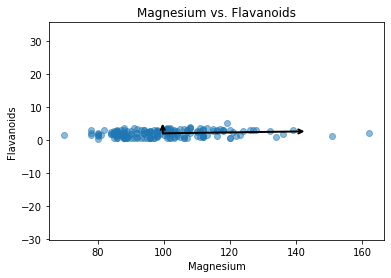

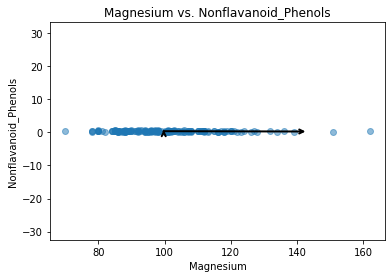

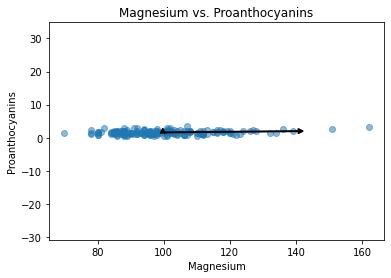

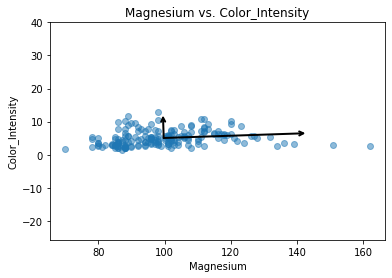

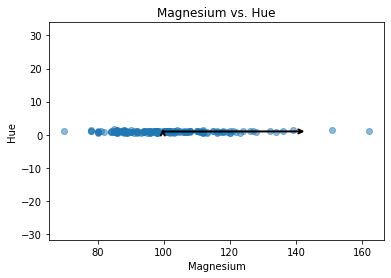

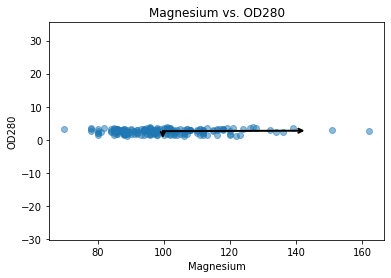

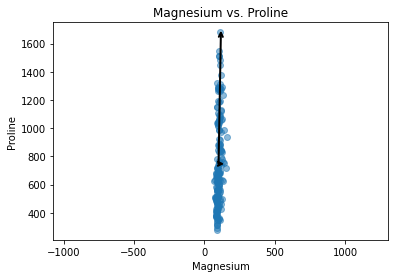

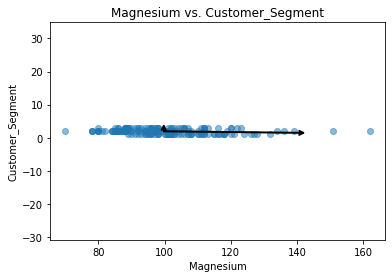

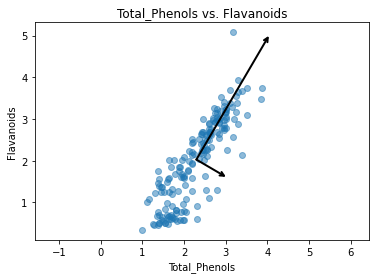

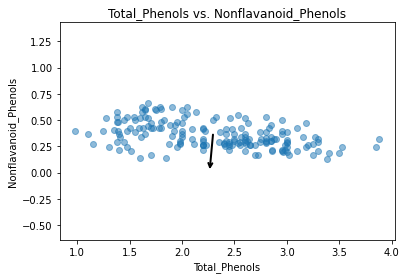

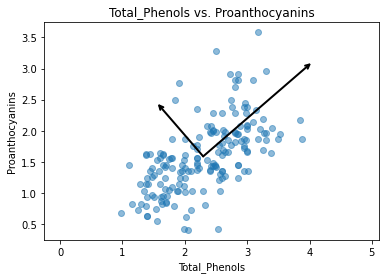

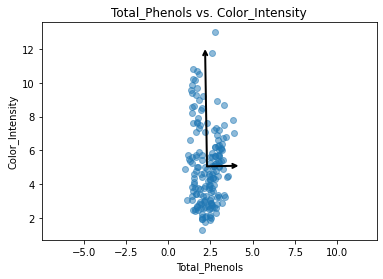

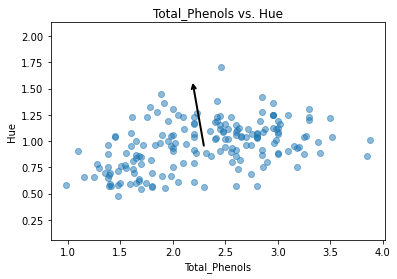

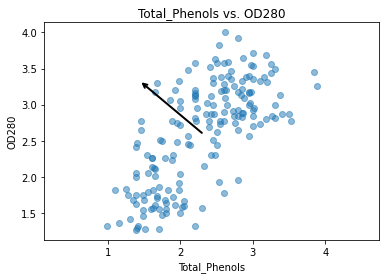

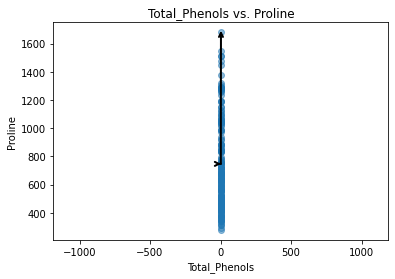

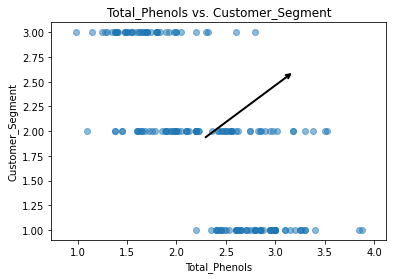

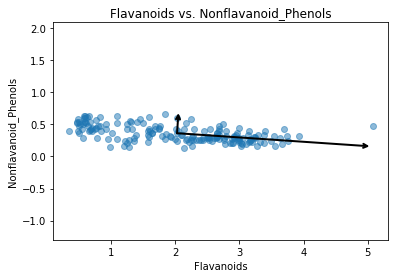

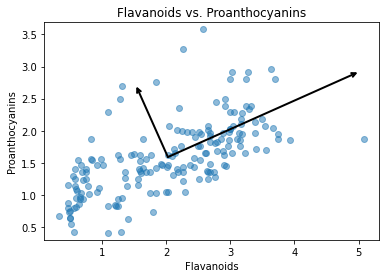

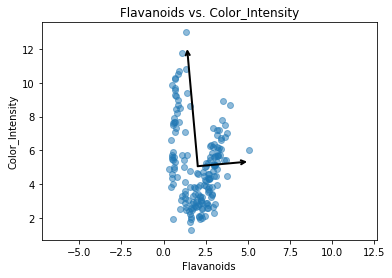

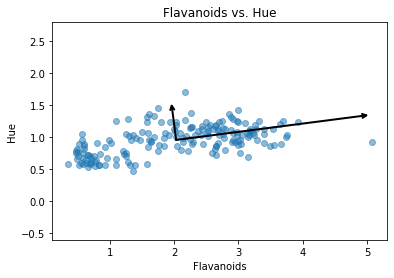

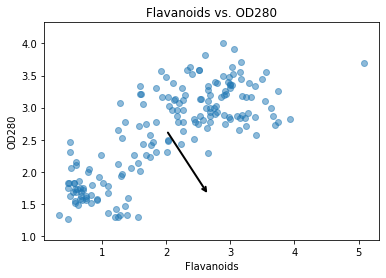

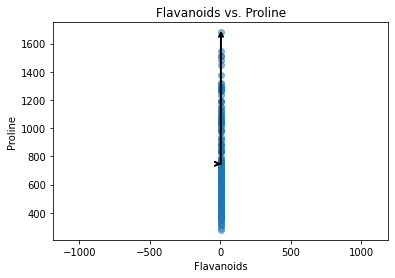

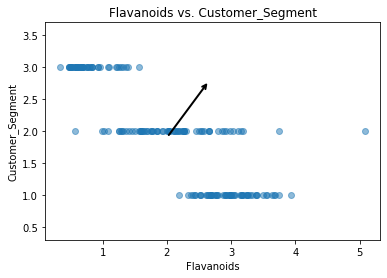

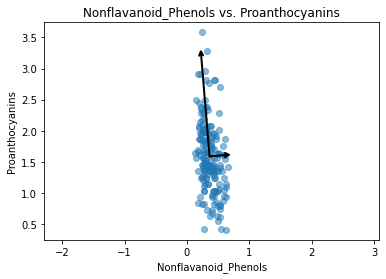

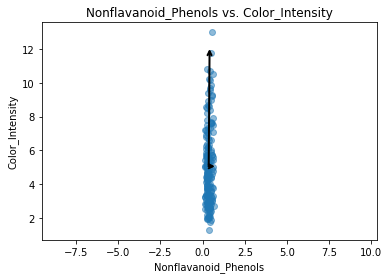

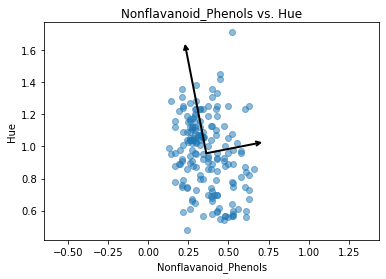

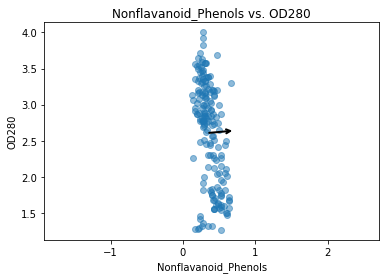

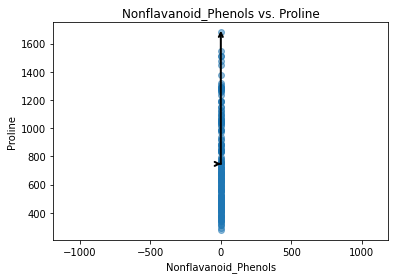

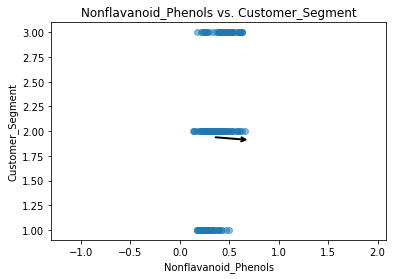

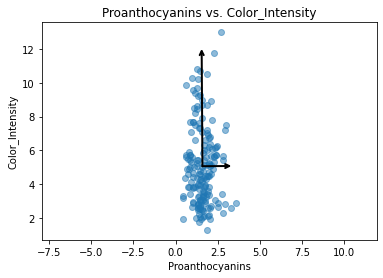

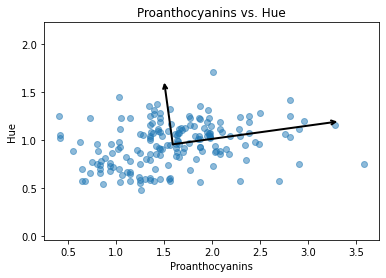

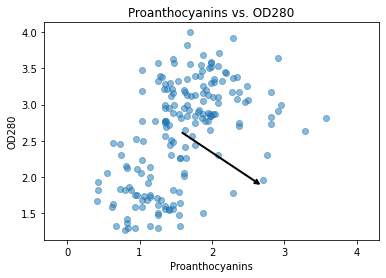

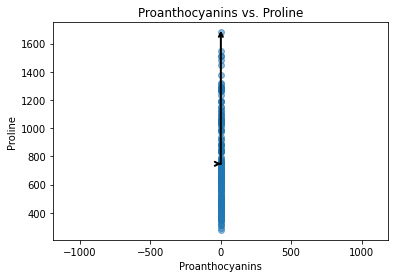

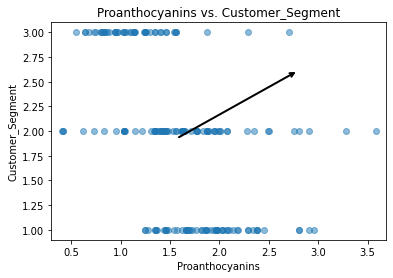

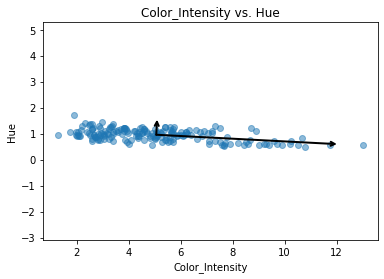

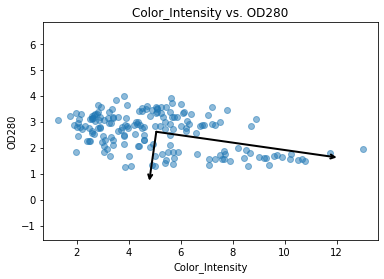

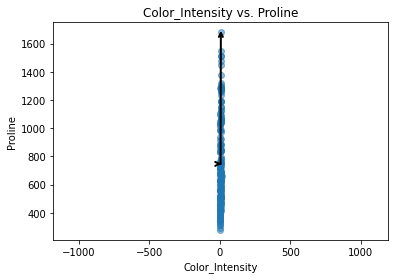

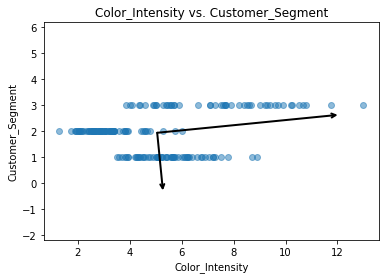

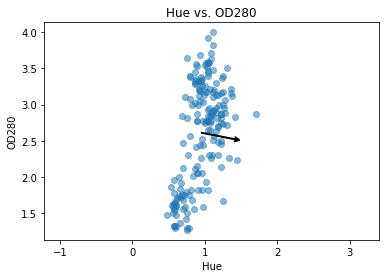

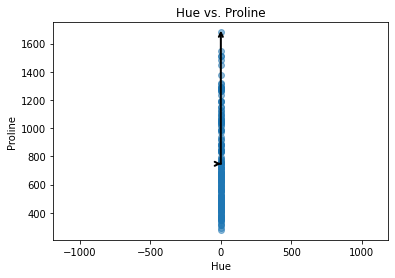

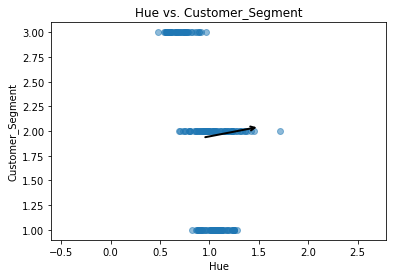

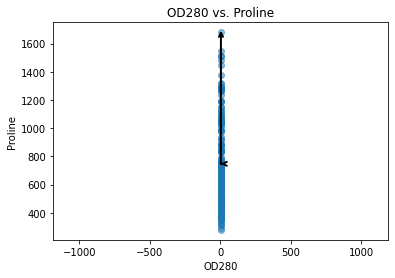

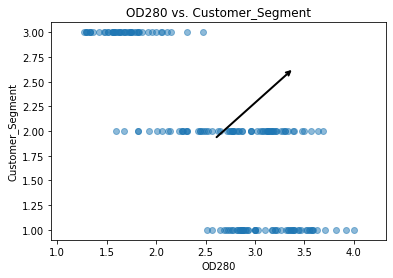

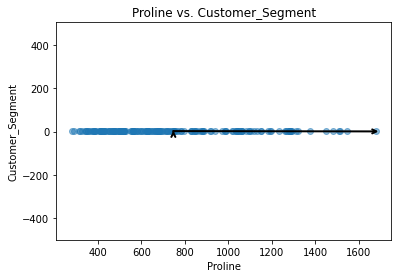

In [11]:
#here we plot the direction of columns against the remaining columns
# this is done to show that the direction of one attribute is always orthogonal to another attributes direction 
for i in range(0,df.shape[1]):
    for j in range(i,df.shape[1]):
        if(i!=j):
            X=pd.concat([df.iloc[:,i:i+1],df.iloc[:,j:j+1]],axis=1)

            #using the package from sklearn to do the PCA of the selected attributes 
            # components is set as two because there are only two attributes selected in each iteration of the nested loop
            pca = PCA(n_components=2)
            pca.fit(X)

            # plotting the two attributes selected with the direction vector
            plt.figure()
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5)
            plt.xlabel(df.columns.values[i]) 
            plt.ylabel(df.columns.values[j]) 
            plt.title(df.columns.values[i]+" vs. "+df.columns.values[j])
            for length, vector in zip(pca.explained_variance_, pca.components_):
                v = vector * 3 * np.sqrt(length)
                draw_vector(pca.mean_, pca.mean_ + v)

            plt.axis('equal')

We see that whenever the direction vectors are plotted, they are all orthogonal to each other i.e., at 90 degrees to each other.  

When there is only one diection vectors ploted it implies  

When no direction vectors are plotted it implies  

### STEP BY STEP IMPLENTATION OF PCA

**STEP 1:**  
Seperate the independent variables from the dependent variable

In [12]:
# creating a dataframe to store the target attribute
Customer_Segment=df.Customer_Segment

#removing the target attribute from the dataframe for further processing
df=df.drop('Customer_Segment',axis='columns')

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.229382   -0.626348  0.063483     -3.894944  27.258427       0.504888   
1  0.199382   -0.556348 -0.226517     -8.294944   0.258427       0.354888   
2  0.159382    0.023652  0.303483     -0.894944   1.258427       0.504888   
3  1.369382   -0.386348  0.133483     -2.694944  13.258427       1.554888   
4  0.239382    0.253652  0.503483      1.505056  18.258427       0.504888   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0     1.03073             -0.081854         0.699101          0.58191   
1     0.73073             -0.101854        -0.310899         -0.67809   
2     1.21073             -0.061854         1.219101          0.62191   
3     1.46073             -0.121854         0.589101          2.74191   
4     0.66073              0.028146         0.229101         -0.73809   

        Hue     OD280     Proline  
0  0.082551  1.308315  318.106742  
1  0.092551  0.788315  303.106742  
2  0.072551  0.558315  438.106742  
3 -0.097449  0.838315  733.106742  
4  0.082551  0.318315  -11.893258

Subtract the mean of each element.   
$x_i - mean(x)$

In [89]:
# creating an new dataframe that store the difference of the attributes and it's mean (aka variation or standard deviation)
df_difference= df - np.mean(df,axis=0)
df_difference.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.229382   -0.626348  0.063483     -3.894944  27.258427       0.504888   
1  0.199382   -0.556348 -0.226517     -8.294944   0.258427       0.354888   
2  0.159382    0.023652  0.303483     -0.894944   1.258427       0.504888   
3  1.369382   -0.386348  0.133483     -2.694944  13.258427       1.554888   
4  0.239382    0.253652  0.503483      1.505056  18.258427       0.504888   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0     1.03073             -0.081854         0.699101          0.58191   
1     0.73073             -0.101854        -0.310899         -0.67809   
2     1.21073             -0.061854         1.219101          0.62191   
3     1.46073             -0.121854         0.589101          2.74191   
4     0.66073              0.028146         0.229101         -0.73809   

        Hue     OD280     Proline  
0  0.082551  1.308315  318.106742  
1  0.092551  0.788315  303.106742  
2  0.072551  0.558315  438.106742  
3 -0.097449  0.838315  733.106742  
4  0.082551  0.318315  -11.893258

**STEP 2**  

Calculate the covariance matrix $Z^{-1}Z$.  

The *covariance matrix $Z^{-1}Z$* is a matrix that contains estimates of how every variable in Z relates to every other variable in Z. Understanding how one variable is related to each other helps aid decisions later.

In [13]:
# creating the covariance matrix with the standardized dataframw df_mean
covariance_matrix=np.cov(df_difference,rowvar=False)

In [14]:
# displaying the values of the covariance matrix
from prettytable import PrettyTable
tab = PrettyTable(df.columns.values.tolist())
tab.add_rows(covariance_matrix)
print(tab)

+-----------------------+----------------------+-----------------------+----------------------+---------------------+----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+---------------------+
|        Alcohol        |      Malic_Acid      |          Ash          |     Ash_Alcanity     |      Magnesium      |    Total_Phenols     |      Flavanoids      |  Nonflavanoid_Phenols |    Proanthocyanins    |    Color_Intensity    |          Hue          |         OD280         |       Proline       |
+-----------------------+----------------------+-----------------------+----------------------+---------------------+----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+---------------------+
|   0.6590623278105759  | 0.08561130895702411  |  0.04711515901733005  | -0.841092

**STEP 3**  

Calculate the eigion values and vectors and sort them in descending order. Then, decide how many eigon vectors to consider for the process.  


*Eigen vectors* represent directions. Eigen values represent magnitude or strength of the relationship. Bigger eigen values correlate with more important directions.

In [42]:
#calculating eigen values and eigen vectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)

# displaying the eigen values
eigen_values

array([8.20370314e-03, 2.10723661e-02, 3.75759789e-02, 7.17026032e-02,
       1.12096765e-01, 1.51381266e-01, 2.78973523e-01, 8.41063869e-01,
       1.22884523e+00, 4.99117861e+00, 9.43811370e+00, 1.72535266e+02,
       9.92017895e+04])

In [16]:
# displaying the eiegen vectors
tab = PrettyTable(df_difference.columns.values.tolist())
tab.add_rows(eigen_vectors[0:])
print(tab)

+------------------------+------------------------+-------------------------+-------------------------+------------------------+-------------------------+------------------------+------------------------+-----------------------+-----------------------+-----------------------+------------------------+-------------------------+
|        Alcohol         |       Malic_Acid       |           Ash           |       Ash_Alcanity      |       Magnesium        |      Total_Phenols      |       Flavanoids       |  Nonflavanoid_Phenols  |    Proanthocyanins    |    Color_Intensity    |          Hue          |         OD280          |         Proline         |
+------------------------+------------------------+-------------------------+-------------------------+------------------------+-------------------------+------------------------+------------------------+-----------------------+-----------------------+-----------------------+------------------------+-------------------------+
| -0.00802924535

In [17]:
#creating an array that store the indexes of the largest eigenvalue to the smallest eigenvalue
sorted_index = np.argsort(eigen_values)[::-1]
 
# rearranging the eigen values based on the indexing in 'sorted_index' array to sort the eigen values
sorted_eigenvalue = eigen_values[sorted_index]
# rearranging the eigen vectors based on the indexing in 'sorted_index' array to match changes made to the egien values
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [94]:
# displaying the eigen values sorted in adescending order
print('Eigon values in descending order:\n\n',sorted_eigenvalue)

Eigon values in descending order:

 [9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 7.17026032e-02 3.75759789e-02 2.10723661e-02
 8.20370314e-03]


In [90]:
# creating an array that stores the name of the columns as per the indexing for the sorted eigen value array
sorted_column_names=df_difference.columns.values[sorted_index]

# displaying the soreted eigon vectors based on the sorted eigen values
print("The eigon vectors corresponding to each attribute:")
tab = PrettyTable(sorted_column_names.tolist())
tab.add_rows(sorted_eigenvectors[0:])
print(tab)

The eigon vectors corresponding to each attribute:
+-------------------------+------------------------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+-------------------------+------------------------+-------------------------+-------------------------+------------------------+------------------------+
|         Proline         |         OD280          |          Hue          |    Color_Intensity    |    Proanthocyanins    |  Nonflavanoid_Phenols  |       Flavanoids       |      Total_Phenols      |       Magnesium        |       Ash_Alcanity      |           Ash           |       Malic_Acid       |        Alcohol         |
+-------------------------+------------------------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+-------------------------+------------------------+-------------------------+-------------------------+----------------

We make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable. Lots of variability usually indicates signal, whereas little variability usually indicates noise. Thus, the more variability there is in a particular direction is, theoretically, indicative of something important we want to detect. 

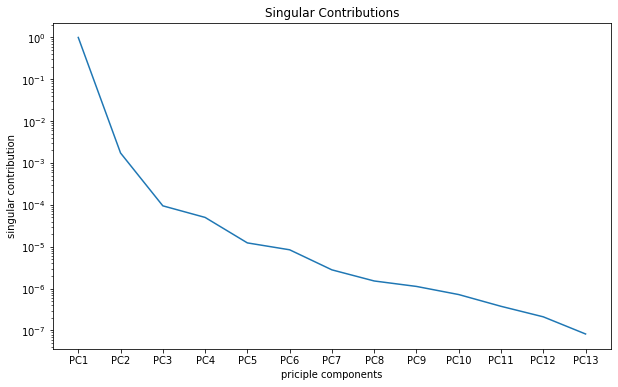

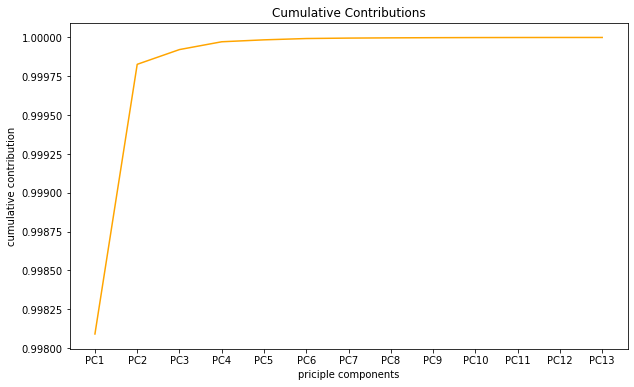

In [88]:
# understanding how much attributes contribute
single_contribution=[]
cumulative_contribution=[]
sum=0
pc=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13']
for i in sorted_eigenvalue:
  single_contribution.append(i/sorted_eigenvalue.sum())
  sum+=i
  cumulative_contribution.append(sum/sorted_eigenvalue.sum())

plt.figure(figsize=(10,6))
plt.plot(pc,single_contribution,label = "single_contribution")
plt.yscale('log')
plt.xlabel("priciple components")
plt.ylabel("singular contribution")
plt.title('Singular Contributions')
plt.show()

plt.figure(figsize=(10,6))
plt.xlabel("priciple components")
plt.ylabel("cumulative contribution")
plt.title('Cumulative Contributions')
plt.plot(pc,cumulative_contribution, label = "cumulative_contribution",color='orange')
plt.show()

Because each eigenvalue is roughly the importance of its corresponding eigenvector, the proportion of variance explained is the sum of the eigenvalues of the features you kept divided by the sum of the eigenvalues of all feature.  

The proportion of variance explained by including only one principal component at a time $i$ is λi/(λ₁ + λ₂ + … + λp). From the first graph we see how much of the variance can be explained by each principle component seperately. The negative curve implies PC1 explains a majority of the variance and the effect of the remaining principle components keeps reducing from PC2.

The proportion of variance explained by including both principal components 1 and 2 is (λ₁ + λ₂)/(λ₁ + λ₂ + … + λp). We see that including only the first principle component explains about 99% of the total variance, including principle components 1 and 2 will explain about 99.9% of the variance. After points PC5, there is minimal change in the curve. This means including those components will not effect the total variance. Therefore, we will be proceeding with the first five eigen vectors. This decision is aided by the inference from the above graph.

**STEP 5**  

Multiply $Z^{-1}Z$ with the original dataset

In [96]:
# setting the required number of components as 5
n_components = 5

# extracting only the first five eigen vectors
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [102]:
#transforming the data by multiplying the selected eigen vectors transpose matrix (5 X 13) into the tranpose of the dataset (13 X 178) which is a (5 X 178) matrix
df_reduced = np.dot(eigenvector_subset.transpose(),df_difference.transpose()).transpose()

In [105]:
print("Principle components:\n")
# displaying the principle components
tab = PrettyTable(pc[:n_components])
tab.add_rows(df_reduced[0:])
print(tab)

Principle components:

+---------------------+----------------------+-----------------------+-----------------------+----------------------+
|         PC1         |         PC2          |          PC3          |          PC4          |         PC5          |
+---------------------+----------------------+-----------------------+-----------------------+----------------------+
|  318.5629792879366  | -21.492130734540016  |   3.1307347048124172  |  0.25011375753991205  | -0.6770782217765665  |
|  303.0974196593864  |  5.364717683063962   |   6.822835495267857   |   0.8640347486025854  |  0.4860959777875798  |
|  438.0611329172363  |  6.537309449440075   |  -1.1132229813677563  |  -0.9124106809475998  | -0.38065142617272185 |
|  733.2401393508117  | -0.1927290320721232  |  -0.9172570156159758  |   0.5412506450386676  | -0.8586622893000104  |
| -11.571428495905657 |  -18.48999460836036  |   -0.554422076453848  |  -1.3608960870364397  | -0.2764415556580044  |
|  703.2311917377222  | 0.3321586

In [ ]:
principal_df = pd.concat([pd.DataFrame(pd.DataFrame(df_reduced,columns=sorted_column_names[:n_components].tolist())), Customer_Segment],axis=1)
principal_df.head()

Proline      OD280       Hue  Color_Intensity  Proanthocyanins  \
0  318.562979 -21.492131  3.130735         0.250114        -0.677078   
1  303.097420   5.364718  6.822835         0.864035         0.486096   
2  438.061133   6.537309 -1.113223        -0.912411        -0.380651   
3  733.240139  -0.192729 -0.917257         0.541251        -0.858662   
4  -11.571428 -18.489995 -0.554422        -1.360896        -0.276442   

   Customer_Segment  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

Let us look at how visualising the different classes has changed after using PCA.

<AxesSubplot:xlabel='Proline', ylabel='OD280'>

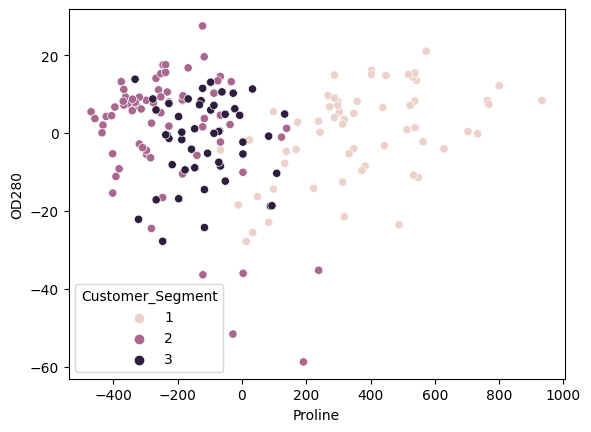

In [ ]:
sns.scatterplot(data = principal_df , x = principal_df.columns.values[0],y =principal_df.columns.values[1], hue = 'Customer_Segment' )